In [1]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import numpy as np
import json
import time
import datetime
import requests
import seaborn as sns
sns.set(style="whitegrid")
import matplotlib.dates as mdates

In [170]:
denver_org_df = pd.read_csv('data/denver_sep_listing.csv')

In [171]:
import copy
denver_df = copy.deepcopy(denver_org_df)

In [172]:
denver_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Columns: 106 entries, id to reviews_per_month
dtypes: float64(22), int64(23), object(61)
memory usage: 3.7+ MB


In [173]:
pd.set_option('display.max_columns', None)

In [174]:
denver_df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,360,https://www.airbnb.com/rooms/360,20190930152238,2019-09-30,LoHi Secret garden at the Chickadee Cottage,Come enjoy our oasis is the city and stay at o...,Chickadee Cottage is the largest of our guest ...,Come enjoy our oasis is the city and stay at o...,none,those who are interested in our local brews - ...,WIFI: Once you have arrived you can find the...,there are several bus lines that cross the nei...,"Chickadee is the main the main property, sever...",We live on the property in the green house dir...,NUMBER ONE HOUSE RULE: please let us know ASAP...,NaN,NaN,https://a0.muscache.com/im/pictures/f622ba3c-c...,NaN,666,https://www.airbnb.com/users/show/666,Jennifer & Giovanni,2008-07-08,"Denver, Colorado, United States",We are artists and tinkerers.\r\n \r\nWe enjoy...,within an hour,100%,NaN,t,https://a0.muscache.com/im/users/666/profile_p...,https://a0.muscache.com/im/users/666/profile_p...,Highland,3.0,3.0,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,t,"Denver, CO, United States",Highland,Highland,NaN,Denver,CO,80211.0,Denver,"Denver, CO",US,United States,39.76703,-105.00256,t,Guesthouse,Entire home/apt,4,1.0,2,3,Futon,"{TV,Wifi,""Air conditioning"",Kitchen,""Free stre...",NaN,$140.00,NaN,NaN,$150.00,$40.00,2,$15.00,1,29,1,2,29,29,1.1,29.0,2 weeks ago,t,6,22,50,319,2019-09-30,82,68,2018-08-13,2019-09-20,100.0,10.0,10.0,10.0,10.0,10.0,10.0,t,2017-BFN-0002177,"{""Colorado State"","" the City and County of Den...",t,f,moderate,t,t,2,2,0,0,5.94
1,590,https://www.airbnb.com/rooms/590,20190930152238,2019-09-30,Comfortable - and a great value!,"Large guest room in my home, where I also live...",I have been enjoying welcoming many wonderful ...,"Large guest room in my home, where I also live...",none,I love the diversity of my neighborhood and it...,Denver (and Colorado) now impose lodging tax o...,The number 20 RTD bus is 2 blocks away to go d...,You may make yourselves at home in all public ...,I am happy to interact as much or as little as...,NaN,NaN,NaN,https://a0.muscache.com/im/pictures/110931/309...,NaN,933,https://www.airbnb.com/users/show/933,Jill,2008-07-21,"Denver, Colorado, United States",I am friendly and I love meeting people from a...,within an hour,100%,NaN,t,https://a0.muscache.com/im/users/933/profi

In [176]:
print("Missing values?")
np.any(denver_df['host_picture_url'].isnull())

Missing values?


True

In [177]:
len(denver_df['cancellation_policy'].unique())

5

In [178]:
denver_df.describe()

,id,scrape_id,thumbnail_url,medium_url,xl_picture_url,host_id,host_acceptance_rate,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,zipcode,latitude,longitude,accommodates,bathrooms,bedrooms,beds,square_feet,guests_included,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,4.601000e+03,4.601000e+03,0.0,0.0,0.0,4.601000e+03,0.0,4597.000000,4597.000000,0.0,4554.000000,4601.000000,4601.000000,4601.000000,4598.000000,4601.000000,4601.000000,23.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4127.000000,4126.000000,4126.000000,4125.000000,4126.000000,4125.000000,4125.000000,4601.000000,4601.000000,4601.000000,4601.000000,4148.000000
mean,2.329794e+07,2.019093e+13,NaN,NaN,NaN,8.175906e+07,NaN,26.869698,26.869698,NaN,80210.509662,39.740406,-104.974858,4.222778,1.456394,1.669420,2.128450,931.391304,2.090850,7.074766,580.554445,6.858726,7.779178,574.454466,575.186264,7.249967,574.672115,8.473158,23.481417,40.564877,132.938057,51.085416,23.120409,96.798158,9.857004,9.753030,9.903515,9.901115,9.841212,9.694788,4.575310,3.860682,0.567051,0.086720,2.986569
std,1.024385e+07,1.609550e+00,NaN,NaN,NaN,8.189472e+07,NaN,164.858440,164.858440,NaN,21.050221,0.032134,0.058043,2.762822,0.887825,1.089893,1.579563,604.805659,1.826497,28.681324,534.146848,28.562297,28.891038,533.043356,532.512550,28.714413,532.878874,8.813835,19.242608,30.368436,123.687008,73.500117,27.228044,5.235762,0.502028,0.603693,0.477830,0.441939,0.477677,0.624573,13.275051,13.218117,1.241455,0.767888,2.589081
min,3.600000e+02,2.019093e+13,NaN,NaN,NaN,6.150000e+02,NaN,0.000000,0.000000,NaN,80010.000000,39.617620,-105.109860,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.010000
25%,1.611541e+07,2.019093e+13,NaN,NaN,NaN,1.672277e+07,NaN,1.000000,1.000000,NaN,80205.000000,39.727930,-105.011250,2.000000,1.000000,1.000000,1.000000,800.000000,1.000000,1.000000,29.000000,1.000000,1.000000,28.000000,29.000000,1.000000,29.000000,0.000000,1.000000,6.000000,18.000000,5.000000,2.000000,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,9.000000,1.000000,1.000000,0.000000,0.000000,0.890000
50%,2.393949e+07,2.019093e+13,NaN,NaN,NaN,4.806572e+07,NaN,1.000000,1.000000,NaN,80210.000000,39.747810,-104.982450,4.000000,1.000000,1.000000,2.000000,900.000000,1.000000,2.000000,365.000000,2.000000,2.000000,365.000000,365.000000,2.000000,365.000000,6.000000,24.000000,46.000000,87.000000,24.000000,13.000000,98.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000,1.000000,0.000000,0.000000,2.390000
75%,3.201101e+07,2.019093e+13,NaN,NaN,NaN,1.381800e+08,NaN,3.000000,3.000000,NaN,80218.000000,39.761580,-104.958030,6.000000,2.000000,2.000000,3.000000,1100.000000,2.000000,3.000000,1125.000000,2.000000,3.000000,1125.000000,1125.000000,3.000000,1125.000000,14.000000,39.000000,66.000000,240.000000,67.000000,36.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,2.000000,1.000000,1.000000,0.000000,4.480000
max,3.901656e+07,2.019093e+13,NaN,NaN,NaN,2.988022e+08,NaN,1797.000000,1797.000000,NaN,80249.000

In [179]:
denver_df_short.shape

(4601, 70)

In [180]:
denver_df_short = denver_df[['host_since','host_location','host_response_time','host_response_rate',
                             'host_acceptance_rate','host_is_superhost','host_neighbourhood',
                             'host_listings_count','host_total_listings_count','host_has_profile_pic',
                             'host_identity_verified','street','neighbourhood','neighbourhood_cleansed',
                             'city','state','zipcode','market','smart_location','latitude','longitude',
                             'is_location_exact','property_type','room_type','accommodates','bathrooms',
                             'bedrooms','beds','bed_type','square_feet','security_deposit','cleaning_fee',
                             'guests_included','extra_people','minimum_nights','maximum_nights',
                             'minimum_minimum_nights','maximum_minimum_nights','minimum_maximum_nights',
                             'maximum_maximum_nights','minimum_nights_avg_ntm','maximum_nights_avg_ntm',
                             'has_availability','availability_30','availability_60','availability_90',
                             'availability_365','number_of_reviews','number_of_reviews_ltm','first_review',
                             'last_review','review_scores_rating','review_scores_rating',
                             'review_scores_accuracy','review_scores_cleanliness','review_scores_checkin',
                             'review_scores_communication','review_scores_location','review_scores_value',
                             'requires_license','jurisdiction_names','instant_bookable','is_business_travel_ready',
                             'cancellation_policy','require_guest_profile_picture',
                             'require_guest_phone_verification','calculated_host_listings_count',
                             'calculated_host_listings_count_entire_homes',
                             'calculated_host_listings_count_private_rooms',
                             'calculated_host_listings_count_shared_rooms','reviews_per_month']]

In [181]:
# convert date columns from str to date

date_columns = ['host_since','first_review','last_review']

for date_column in date_columns:
    denver_df_short[date_column] = denver_df_short[date_column].apply(lambda x : 
                                                                      datetime.datetime.strptime(x, "%Y-%m-%d") 
                                                                      if isinstance(x, str)
                                                                      else np.nan)

/Users/pbashiri/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [182]:
# convert percentage to number
denver_df_short['host_response_rate'] = denver_df_short['host_response_rate'].apply(lambda x:
                                                                                    int(x[:-1]) if isinstance(x, str)
                                                                                    else np.nan)

/Users/pbashiri/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [184]:
# drop "host_acceptance_rate" column as all the values are nan
denver_df_short = denver_df_short.drop(columns=['host_acceptance_rate'])

In [185]:
# delete the duplicate column 'review_scores_rating'

review_scores_rating_series = denver_df_short['review_scores_rating'].iloc[:,0]
denver_df_short = denver_df_short.drop(columns=['review_scores_rating'])
denver_df_short['review_scores_rating'] = review_scores_rating_series

In [186]:
for col_name in denver_df_short.columns:
    if(denver_df_short[col_name].dtype == 'object'):
        denver_df_short[col_name]= denver_df_short[col_name].astype('category')
        denver_df_short[col_name] = denver_df_short[col_name].cat.codes

In [187]:
denver_df_short.dtypes

host_since                                      datetime64[ns]
host_location                                            int16
host_response_time                                        int8
host_response_rate                                     float64
host_is_superhost                                         int8
host_neighbourhood                                        int8
host_listings_count                                    float64
host_total_listings_count                              float64
host_has_profile_pic                                      int8
host_identity_verified                                    int8
street                                                    int8
neighbourhood                                             int8
neighbourhood_cleansed                                    int8
city                                                      int8
state                                                     int8
zipcode                                                

In [188]:
print("Missing data in the dataset?", np.any(denver_df_short.isnull()))

Missing data in the dataset? True


In [189]:
# impute missing values 

denver_df_short_impute = denver_df_short.copy(deep=True)
for col in denver_df_short_impute.columns:
    denver_df_short_impute[col].fillna(denver_df_short_impute[col].min(), inplace=True)

print("Missing data? ", np.any(denver_df_short_impute.isnull()))

Missing data?  False


In [192]:
ts_columns = ['host_since','first_review','last_review']
denver_df_short_impute_no_ts = denver_df_short_impute.drop(columns=ts_columns)

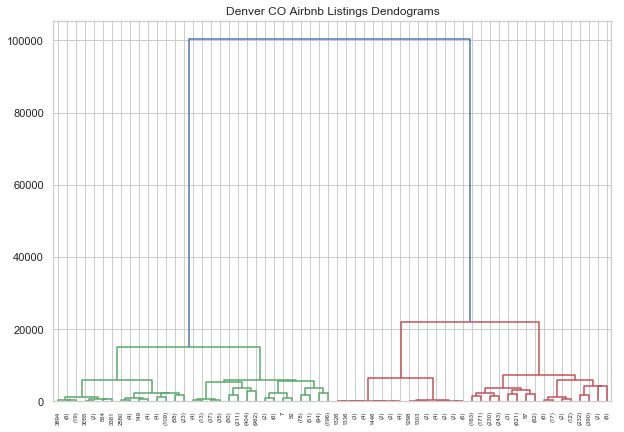

In [204]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))
plt.title("Denver CO Airbnb Listings Dendograms")
dend = shc.dendrogram(shc.linkage(denver_df_short_impute_no_ts.values, method='ward'), 
                      truncate_mode = 'level', p = 5)

In [205]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
cluster.fit_predict(denver_df_short_impute_no_ts)

array([1, 3, 3, ..., 4, 4, 1])

In [209]:
import sys
np.set_printoptions(threshold=sys.maxsize)

In [210]:
cluster.labels_

array([1, 3, 3, 1, 2, 3, 1, 1, 4, 2, 1, 1, 1, 3, 1, 3, 1, 1, 3, 3, 1, 3,
       2, 1, 1, 2, 1, 3, 1, 1, 2, 3, 3, 1, 1, 4, 1, 1, 1, 1, 3, 1, 1, 3,
       3, 1, 2, 1, 1, 1, 1, 2, 1, 1, 3, 2, 3, 4, 2, 3, 2, 4, 1, 2, 4, 2,
       2, 1, 1, 1, 2, 2, 1, 1, 3, 3, 3, 4, 3, 1, 1, 3, 1, 4, 1, 3, 1, 4,
       1, 1, 1, 1, 4, 2, 1, 3, 1, 2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 4,
       4, 4, 3, 1, 1, 2, 2, 1, 1, 2, 2, 2, 1, 3, 3, 1, 1, 1, 1, 2, 1, 4,
       2, 1, 2, 1, 1, 2, 4, 3, 2, 1, 2, 2, 1, 1, 4, 4, 4, 3, 2, 3, 2, 4,
       2, 4, 1, 1, 4, 1, 1, 1, 3, 1, 2, 4, 3, 1, 4, 1, 1, 1, 3, 1, 1, 1,
       2, 2, 1, 1, 4, 1, 2, 1, 1, 2, 2, 4, 2, 2, 2, 1, 1, 2, 2, 2, 4, 1,
       3, 3, 1, 1, 4, 3, 4, 1, 1, 1, 1, 1, 1, 1, 2, 4, 4, 1, 1, 4, 4, 3,
       2, 1, 4, 2, 1, 1, 1, 1, 1, 4, 2, 1, 4, 1, 4, 1, 1, 4, 4, 4, 4, 1,
       4, 1, 4, 4, 2, 4, 3, 2, 1, 1, 1, 2, 4, 1, 4, 2, 2, 4, 3, 2, 2, 2,
       1, 4, 1, 4, 1, 4, 1, 4, 4, 4, 2, 1, 1, 2, 4, 1, 4, 1, 1, 2, 4, 4,
       1, 1, 3, 1, 1, 3, 1, 4, 2, 2, 2, 1, 2, 1, 4,